In [ ]:
import openmc
from matplotlib import pyplot as plt
import numpy as np

## Part I: Full Geometry Model

In this section, you will develop a simple model of a realistic system. 

The system represents an integral experiment for measuring neutron cross sections,
in which an ion beam is directed at a target to produce neutrons in the center
of a sphere of test material.

Rather than modeling the ion beam, we will make
assumptions about the source and instead model a pure neutron beam. How
convenient for us.

1. Beginning with the materials below, generate a model for the geometry desribed below

    The model consists of a sphere of Be (radius, r=25 cm) with a 2 cm-radius hole
    running from one side to the center. 
    Centered in the sphere is a disc-shaped
    tritium target (r=2 cm, thickness=0.5 cm). 
    
    The Be sphere is embedded in a sphere
    of concrete (r=40 cm) that also has a 2 cm-radius hole (aligned with the hole in
    the Be sphere).


2. Now modify the above model according to the following

    - Using a `CompositeSurface`, replace the concrete sphere with a concrete
    cube that has the same extents.
    - Replace the cylindrical hole in the Be with a cone that opens from a
    radius of 2 cm near the target to a radius of 4 cm at the outside of the Be
    sphere (i.e., at r=25 cm).
    - The hole should continue through the concrete as
    a 4 cm radius cylinder.

3. Define any additional space that is left undefined inside the radius of the concrete sphere (r = 40cm).

4. Apply appropriate boundary conditions to the exterior surfaces of the model.

5. Plot both the cells and materials with a plane that slices through center of the hole.

A plot of the geometry in the x-y (z=0) should look like the image below

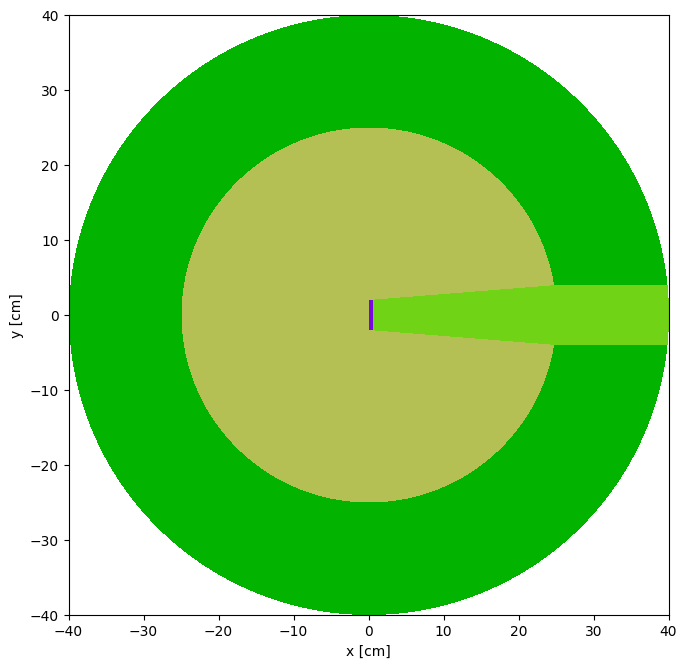

## Part II: Repeated Geometry


In this section, you will use a rectangular lattice to generate a 10 x 10 x 1
array of spheres

**The lattice should be centered on (3, 3, 0). The model should span -2 to 2 cm in the z direction for one axial layer.**

In this lattice, the spheres will alternate in both directions
between a 1 cm radius sphere of Uranium-235 and a 0.5 cm radius sphere of boron.

All spheres are spaced 4 cm apart.

The spaces between the spheres is filled with water. The
following steps will help you create this geometry.

Create the following surfacces:

  - Create surfaces for the two spheres (r=1 cm and r=0.5 cm). Both surfaces may be defined at the origin. The spheres will not overlap when they are used in the lattice.
  - Create a surface (macrobody) [or surfaces (planes)] to define a single lattice element that surrounds the spheres
  - Create a surface to define the outer boundary of the entire lattice.

Create the following cells:

  - Create cells for each of the spheres and surrounding water (there should be two distinct water cells).
  - Create universes for the uranium+water and boron+water cell combinations.
  - Create the lattice as described above
  - Create a cell with a region that bounds the entire lattice and fill it with the lattice. Apply an appropriate boundary condition to this cell.
  - Create a universe that contains the lattice cell.
  - Plot the final lattice colored by both cell and material.
  - Finally, attempt a successful simulation with geometry debugging enabled.

In [ ]:
be = openmc.Material()
be.set_density('g/cc', 1.85)
be.add_nuclide('Be9', 1.0)

tritium = openmc.Material()
tritium.set_density('g/cc', 0.01)
tritium.add_nuclide('H3', 1.0)

concrete = openmc.Material()
concrete.set_density('g/cc', 3.0)
concrete.add_nuclide('Ba132', 0.5, 'wo')
concrete.add_nuclide('O16', 0.2, 'wo')
concrete.add_nuclide('H1', 0.1, 'wo')

water = openmc.Material()
water.set_density('g/cc', 1.0)
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)

boron = openmc.Material()
boron.set_density('g/cc', 2.5)
boron.add_nuclide('B11', 1.0)

U235 = openmc.Material()
U235.set_density('g/cc', 10)
U235.add_nuclide('U235', 1.0)

In [ ]:
# execution settings
settings = openmc.Settings()
settings.particles = 5000
settings.batches = 100
settings.inactive = 10

# don't forget to export the model to XML!
openmc.run(geometry_debug=True)